In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read train and test data
master_train = pd.read_csv('train.csv')
master_test = pd.read_csv('test.csv')
master_train.head()

,label,feature
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
# define training data dimension
m = master_train.shape[0]
n_w = 48
n_h = 48

In [4]:
# store training data in arrays of correct dimensions
X = np.zeros((m, n_w, n_h), dtype=int)
y = np.zeros((m), dtype=int)
for i in range(m):
    X[i] = np.fromstring(master_train['feature'][i], dtype=int, sep=' ').reshape(n_w, n_h)
    y[i] = int(master_train['label'][i])
    
 # store testing data in arrays of correct dimensions   
X_test = np.zeros((master_test.shape[0], n_w, n_h), dtype = int)
for i in range(master_test.shape[0]):
    X_test[i] = np.fromstring(master_test['feature'][i], dtype=int, sep=' ').reshape(n_w, n_h)

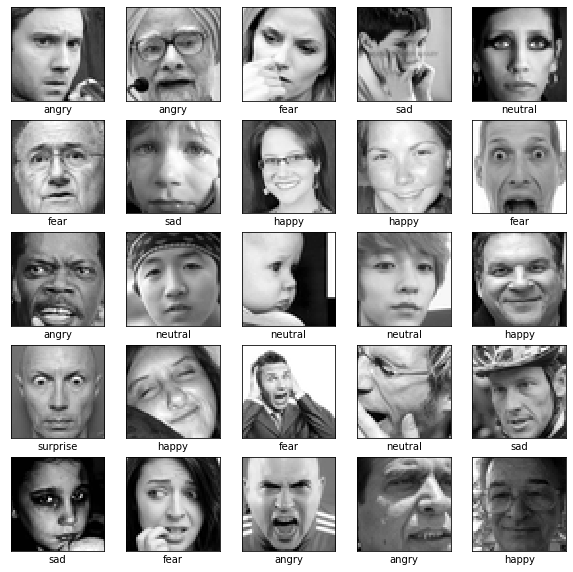

In [5]:
# create a list of sentiment labels
sentiment_label = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
# plot and label first 25 images
plt.figure(figsize= (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.gray)
    plt.xlabel(sentiment_label[y[i]])
plt.show()